# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>
## <span style="color:green"> Esercitazione Numerica #10</span>

Gli argomenti trattati durante la decima lezione teorica vertevano quasi unicamente sull'introduzione del calcolo in parallelo (**Parallel Computing**), con un focus particolare sul paradigma **SPMD** (Single Program Multiple Data) che abbiamo visto essere una tecnica di parallelismo nella quale tutti i processi (CPU) lavorano sul medesimo eseguibile e vengono distinti grazie al valore del *rank*. Assegnando compiti all'interno del codice, a seconda del valore di questa variabile, è quindi possibile parallelizzare un programma aumentandone le prestazioni di calcolo. Nello specifico, durante l'esercitazione, abbiamo fatto riferimento alla libreria **MPI** per risolvere il problema del commesso viaggiatore utilizzando tecniche di parallelismo (*Esercizio 10.2*).

### <span style="color:darkorange"> Esercizio 10.1</span>

Il primo esercizio consisteva nella scrittura di un codice in grado di  risolvere il problema del commesso viaggiatore TSP utilizzando la tecnica del **Simulated Annealing** (SA), introdotta nella lezione precedente. Come abbiamo già visto, alle basi di questo metodo di ottimizzazione, c'è una forte analogia con la termodinamica e la Meccanica Statistica. Fondamentalmente, quello che si fa è interpretare la funzione costo del problema $L(x)$ (nel nostro caso il funzionale lunghezza $L$) come l'energia di un sistema in Meccanica Statistica, soggetto ad una distribuzione di Boltzmann del tipo: $p(x) \propto \exp[-\beta L(x)]$. Sfruttando metodi MC, nello specifico l'algoritmo di Metropolis, ho potuto campionare questi pesi statiscici a temperatura, e quindi $\beta$, fissata, accettando o rigettando le mosse proposte ad ogni step con una probabilità del tipo:

$$P = \begin{cases} \exp \left[-\beta \left( L(\vec{x}') - L(\vec{x}) \right) \right] \quad \; se \; L(\vec{x}') > L(\vec{x}) \\ \quad \quad \quad 1 \quad \quad \quad \quad \quad \quad \; altrimenti \end{cases}$$

Per svolgere l'esercizio ho dovuto, per prima cosa, generare le posizioni di tutte le città da visitare su un piano bidimensionale, caricandole di volta in volta all'interno di un'oggetto  <font face = "Courier"> map</font> ed etichettandole con un numero intero compreso tra $1$ e $l$. In questo modo, qualunque percorso poteva essere codificato come un array di dimensione $l$ in cui ogni componente conteneva un numero intero distinto compreso tra $1$ e $l$, ed il cui ordinamento definiva quindi in modo univoco la traiettoria seguita. A questo punto, per costruire in modo randomico il mio percorso iniziale, ho seguito i passaggi descritti nella lezione precedente, ovvero ho generato un array di interi inizialmente ordinato e successivamente ne ho modificato la struttura applicando varie volte un algoritmo di scambio a coppie delle componenti. Anche questa volta, per diminuire il grado di degenerazione del problema relativo in particolare alla non univocità del punto di partenza, ho implementato questo settaggio randomico iniziale, e anche tutte le successive mosse d'evoluzione, in modo tale che il mio percorso partisse sempre dalla prima città generata sulla mappa, codificata dal valore $1$. Una volta fissata la temperatura iniziale $T_0=20$ e il rate di raffreddamento $R_{cool} = 0.99$, ho fatto partire la mia simulazione. Chiaramente, avendo implementato l'algoritmo di Metropolis, ogni step di simulazione consisteva nella proposta di una mossa e, dopo un controllo, nella sua accettazione o rigetto. Nello specifico, all'interno di ogni mossa, venivano proposti, ognuno con la propria probabilità di accettazione, vari algoritmi di evoluzione costruiti riprendendo le funzioni di mutazione genetica scritte per il codice dell'esercitazione 9. Per completezza riporto di seguito gli algoritmi utilizzati a tale scopo: 

- permutazione a coppie (scambio) delle città (tranne che per la prima) con probablitia $p=10\%$;
- shift di $+n$ posizioni per $m$ città contigue (tranne che per la prima e $m \lt N-1$), le restanti componenti non traslate venivano riempite seguendo l'ordine di comparsa all'interno del tragitto di partenza con probablitia $p=10\%$;
- permutazione di $m$ città contigue (tranne che per la prima) con altre $m$ città contigue distinte ($m<N/2$) con probablitia $p=10\%$;
- inversione dell'ordine di comparsa nel percorso di $m$ città (tranne che per la prima e $m \le N$) con probablitia $p=10\%$.

Una volta completato un set di $N_0$ step MC, ho scalato la mia temperatura moltiplicandola per $R_{cool}$ e ho ripetuto la mia simulazione per un numero di volte pari a $N_1$, partendo però dall'ultima configurazione generata nel blocco precedente. Questa operazione è stata quindi iterata fino al raggiungimento di una temperatura limite prossima a zero $T_{abs} = 0.0005$. Nello specifico, sono stati utilizzati un numero di step di simulazione pari a $100$ per $T_{sim}>1$, e uguale a $10^4$ per $T_{sim}<1$.

Una volta terminata la scrittura del codice, ho utilizzato il Simulated Annealing per risolvere il TSP nei due casi riportati di seguito:

- 32 città disposte randomicamente lungo una circonferenza di raggio $R=1$;
- 32 città disposte randomicamente all'interno di un quadrato di lato $a=1$.

In entrambi i casi ho plottato l'andamento della lunghezza del numero di step Monte Carlo (nello specifico ho plottato il valore del primo step di ogni blocco valutato a temperatura fissata) e ho graficato il percorso migliore ottenuto a simulazione completata. Di seguito sono riportati i risultati della simulazione del TSP con città disposte lungo la circonferenza.

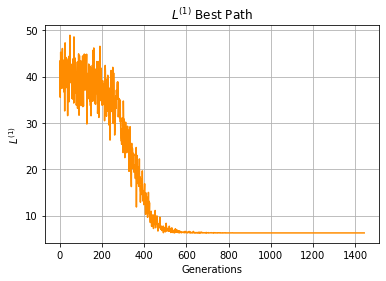

 Final Lenght of Best Path = 6.2403


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

best = np.loadtxt("Esercizio10.1/Circonference/best.path.0", usecols=(1), delimiter=' ', unpack='true')

N = 1444
n = np.arange(N)

plt.plot(n,best,color='darkorange')
plt.title('$L^{(1)}$ Best Path')
plt.xlabel('Generations')
plt.ylabel('$L^{(1)}$')
plt.grid(True)
plt.show()

n = 1444
print(" Final Lenght of Best Path = "+str(best[n-1]))

Osservando l'andamento della curva soprariportata, si può toccare con mano la potenza del simulated annealing. Vediamo come, durante i primi blocchi di simulazione, la lunghezza del percorso sia caratterizzata da grandi fluttuazioni intorno a valori molto alti, in accordo col fatto che, nel limite di alte temperature, l'algoritmo di Metropolis accetterà la maggior parte delle mosse proposte, favorendo l'esplorazione di tutte le possibili configurazioni, e quindi dell'andamento del funzionale lunghezza $L^{(1)}$, in modo randomico. Man mano che il sistema viene lentamente raffreddato, notiamo però come il nostro percorso campione tenda ad avvicinarsi sempre di più a quello che ci aspettiamo essere il tragitto caratterizzato dalla lunghezza più piccola possibile, in corrispondenza del quale si può osservare la curva $L^{(1)}$ saturare a un valore fissato pari a $6.2403$. Osserviamo come la lunghezza minima raggiunta sia leggermente inferiore alla lunghezza della circonferenza $2\pi$, come potevamo già aspettarci a priori dalle condizioni imposte sul problema.

Il percorso migliore ottenuto a simulazione terminata è riportato di seguito.

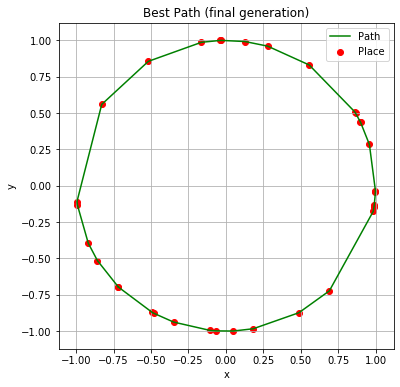

In [3]:
x,y = np.loadtxt("Esercizio10.1/Circonference/final.path.0", usecols=(1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(6, 6))
plt.plot(x,y,color='g',label='Path')
plt.scatter(x,y,color='r',label='Place')
plt.title('Best Path (final generation)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

Come atteso, il percorso più breve è quello che passa per tutti i punti seguendo il loro ordine lungo la circonferenza.

Per quanto riguarda il TSP nel caso in cui le città vengano generate randomicamente all'interno di un quadrato, i risultati ottenuti dalla simuazione sono riportati all'interno dei due pannelli sottostanti.

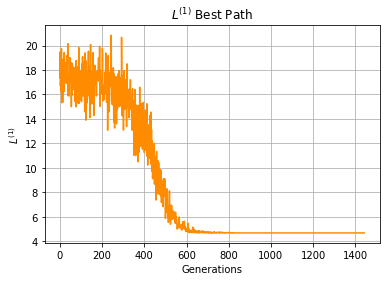

 Final Lenght of Best Path = 4.69098


In [4]:
best = np.loadtxt("Esercizio10.1/Square/best.path.0", usecols=(1), delimiter=' ', unpack='true')

N = 1444
n = np.arange(N)

plt.plot(n,best,color='darkorange')
plt.title('$L^{(1)}$ Best Path')
plt.xlabel('Generations')
plt.ylabel('$L^{(1)}$')
plt.grid(True)
plt.show()

n = 1444
print(" Final Lenght of Best Path = "+str(best[n-1]))

Analogamente al caso precedente, osserviamo come ad alte temperature la lunghezza fluttui intorno a valori relativamente grandi, mentre, raffreddando il sistema lentamente, si può notare come la curva saturi a un valore che ci aspettiamo essere il minimo globale della funzione costo $L^{(1)}$.

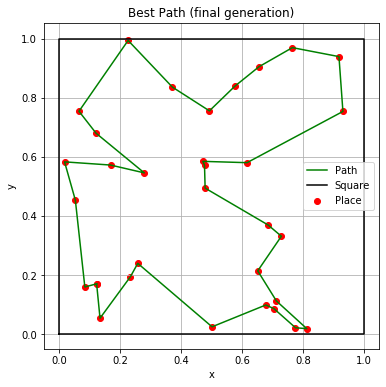

In [5]:
x,y = np.loadtxt("Esercizio10.1/Square/final.path.0", usecols=(1,2), delimiter=' ', unpack='true')

a = 1
x_square = [0,a,a,0,0]
y_square = [0,0,a,a,0]

plt.figure(figsize=(6, 6))
plt.plot(x,y,color='g',label='Path')
plt.plot(x_square,y_square,color='black',label='Square')
plt.scatter(x,y,color='r',label='Place')
plt.title('Best Path (final generation)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In virtù della complessità del problema, non è possibile stabilire a priori se il tragitto rappresentato coincide con un minimo locale o globale. Tuttavia possiamo confrontare i risultati soprariportati con quelli ottenuti dall'esercitazione precedente. Da questo confronto possiamo dedurre come il processo di ottimizzazione seguito all'interno dell'esercitazione 9 si sia bloccato in corrispondenza di una configurazione di minimo locale.

### <span style="color:darkorange"> Esercizio 10.2</span>

Come già detto nell'introduzione, il secondo esercizio consisteva nella parallelizzazione, tramite le librerie MPI, del codice di algoritmo genetico scritto per l'esercitazione 9, in modo da risolvere il problema del commesso viaggiatore lavorando questa volta **in parallelo**. Nello specifico, il programma richiesto, doveva essere in grado di un performare la ricerca del miglior cammino tramite algoritmo genetico, eseguendo in parallelo $4$ simulazioni indipedenti.

Durante l'esecuzione del programma quindi, ognuno dei $4$ processi (o *continenti*) generava una popolazione iniziale in modo randomico e ne simulava l'evoluzione genetica per un numero di generazioni pari a $N_{gen}=10^4$, sfruttando le medesime funzioni di mutazione, selezione e crossover implementate per l'esercitazione 9. Per rendere effettivamente indipendenti le $4$ simulazioni eseguite in parallelo, ho inizializzato i miei generatori di numeri casuali con semi distinti a seconda del valore del rank. Infine, ho aggiunto delle righe di codice che permettevano ai processi di scambiarsi informazioni riguardo i risultati delle rispettive simulazioni "on the fly". Ogni $N_{migr}=10^3$ infatti, i continenti dovevano cedere randomicamente il loro migliore individuo. Ciò è stato fatto sfruttando le funzioni <font face = "Courier"> Send </font> e <font face = "Courier"> Recv </font> contenute all'interno della libreria MPI. In particolare, per evitare problemi di riempimento del buffer di sistema, ho utilizzato anche la funzione <font face = "Courier"> Isend </font>, un metodo non bloccante, che, al contrario dei precedenti, non porta il codice verso punti morti in quanto la sua esecuzione si svolge in background. Ciò permette infatti al processo di svuotare in anticipo il buffer di sistema chiamando il metodo <font face = "Courier"> Recv </font>.

Una volta ultimate le modifiche, ho potuto applicare il mio codice per risolvere il TSP disponendo randomicamente $32$ città all'interno di un quadrato di lato $a=1$. Di seguito sono riportati gli andamenti della lunghezza  $L^{(1)}$ del miglior cammino in funzione degli step evolutivi per tutti i $4$ continenti.

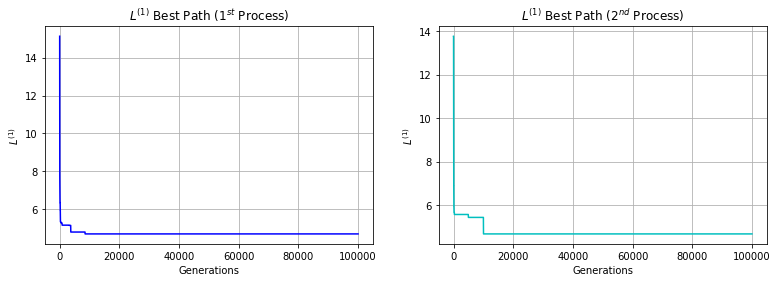

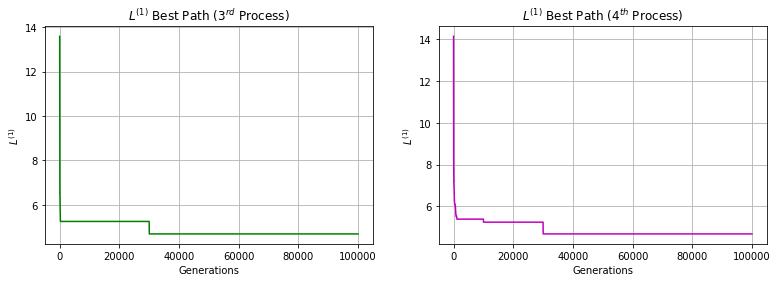

 Final Lenght of Best Path in First process  = 4.68713
 Final Lenght of Best Path in Second process = 4.68713
 Final Lenght of Best Path in Third process  = 4.68713
 Final Lenght of Best Path in Fourth process = 4.68713


In [6]:
n0,best0 = np.loadtxt("Esercizio10.2/best.path0.0", usecols=(0,1), delimiter=' ', unpack='true')
n1,best1 = np.loadtxt("Esercizio10.2/best.path1.0", usecols=(0,1), delimiter=' ', unpack='true')
n2,best2 = np.loadtxt("Esercizio10.2/best.path2.0", usecols=(0,1), delimiter=' ', unpack='true')
n3,best3 = np.loadtxt("Esercizio10.2/best.path3.0", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(n0,best0,color='b')
plt.title('$L^{(1)}$ Best Path ($1^{st}$ Process)')
plt.xlabel('Generations')
plt.ylabel('$L^{(1)}$')
plt.grid(True)

plt.subplot(132)
plt.plot(n1,best1,color='c')
plt.title('$L^{(1)}$ Best Path ($2^{nd}$ Process)')
plt.xlabel('Generations')
plt.ylabel('$L^{(1)}$')
plt.grid(True)

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(n2,best2,color='g')
plt.title('$L^{(1)}$ Best Path ($3^{rd}$ Process)')
plt.xlabel('Generations')
plt.ylabel('$L^{(1)}$')
plt.grid(True)

plt.subplot(132)
plt.plot(n3,best3,color='m')
plt.title('$L^{(1)}$ Best Path ($4^{th}$ Process)')
plt.xlabel('Generations')
plt.ylabel('$L^{(1)}$')
plt.grid(True)

plt.show()

n = 100000
print(" Final Lenght of Best Path in First process  = "+str(best0[n-1]))
print(" Final Lenght of Best Path in Second process = "+str(best1[n-1]))
print(" Final Lenght of Best Path in Third process  = "+str(best2[n-1]))
print(" Final Lenght of Best Path in Fourth process = "+str(best3[n-1]))

Dai grafici soprariportati possiamo estrapolare alcune interessanti ed istruttive informazioni relative alla simulazione appena eseguita. Vediamo innanzitutto come, per quasi tutti i processi, l'andamento di $L^{(1)}$ presenti uno o più "scalini" in corrispondenza di multipli interi di $N_{migr}$. Questo è dovuto proprio allo scambio di informazioni tra continenti descritto sopra. In particolare, confrontando tra loro i quattro grafici, possiamo fare le seguenti considerazioni:

- il primo scambio, avvenuto dopo $N_{migr}$ step di simulazione, ha portato il primo processo a cedere il suo miglior individuo al secondo processo (e viceversa), portando ad un crollo di $L^{(1)}$ per quest'ultimo. Contemporaneamente lo scambio ha interessato anche il terzo ed il quarto processo, anche se il risultato appare meno evidente;

- al passo $3 \cdot N_{migr}$, osserviamo un crollo di $L^{(1)}$ per il terzo e quarto continente, dovuto questa volta allo scambio degli individui migliori dei primi due processi con quelli degli ultimi due.

Inoltre, osservando i valori finali di $L^{(1)}$ ottenuti dalle simulazioni, possiamo notare come, grazie principalmente allo scambio d'informazioni avvenuto "on the fly", i $4$ processi tendano a convergere verso la medesima configurazione ottimale riportata all'interno del pannello sottostante.

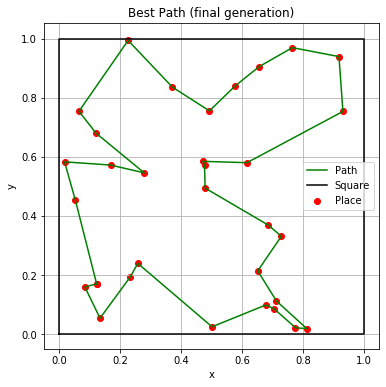

In [7]:
x,y = np.loadtxt("Esercizio10.2/final.path0.0", usecols=(1,2), delimiter=' ', unpack='true')

a = 1
x_square = [0,a,a,0,0]
y_square = [0,0,a,a,0]

plt.figure(figsize=(6, 6))
plt.plot(x,y,color='g',label='Path')
plt.plot(x_square,y_square,color='black',label='Square')
plt.scatter(x,y,color='r',label='Place')
plt.title('Best Path (final generation)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.show()

Notiamo, innanzitutto, come il cammino ottenuto tramite ricerca in parallelo per GA ci abbia condotto verso un risultato differente da quelli ricavati in precedenza. In particolare, grazie ad un banale confronto dei risultati soprariportati, è possibile dedurre che il percorso ottimale, calcolato tramite simulated annealing, coincide con un minimo locale del funzionale  $L^{(1)}$, mentre, in virtù della complessità del problema, non è possibile stabilire a priori se il tragitto appena ottenuto coincide con un minimo locale o globale. Questi risultati sono molto istruttivi in quanto ci permettono di toccare con mano le difficoltà associate alla risoluzione di un problema di ottimizzazione non banale, come per l'appunto il TSP per città disposte randomicamente all'interno di un quadrato.